In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

# Display the data table for preview
combined_df = pd.merge(ride_data, city_data, how="outer", on='city')
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

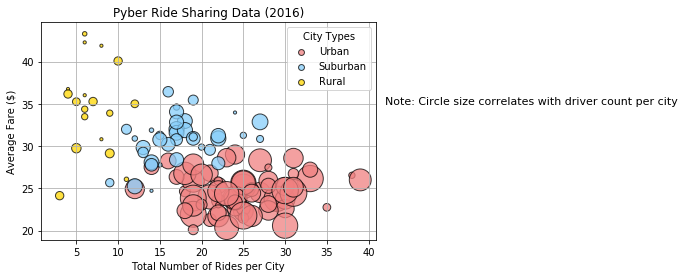

In [19]:
# Obtain the x and y coordinates for each of the three city types
scatter_df = combined_df[['type','driver_count','ride_id','fare','city']]
scatter_gb = scatter_df.groupby(['type','city'])



rural_df = scatter_df[scatter_df['type']=='Rural']
rural_gb = rural_df.groupby(['city'])
x_rural = rural_gb['ride_id'].count()
y_rural = rural_gb['fare'].mean()
z_rural = rural_gb['driver_count'].mean()

urban_df = scatter_df[scatter_df['type']=='Urban']
urban_gb = urban_df.groupby(['city'])
x_urban = urban_gb['ride_id'].count()
y_urban = urban_gb['fare'].mean()
z_urban = urban_gb['driver_count'].mean()

suburban_df = scatter_df[scatter_df['type']=='Suburban']
suburban_gb = suburban_df.groupby(['type','city'])
x_suburban = suburban_gb['ride_id'].count()
y_suburban = suburban_gb['fare'].mean()
z_suburban = suburban_gb['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban,s=10*z_urban,alpha=0.75, label = "Urban",facecolors='lightcoral',edgecolors = 'black')
plt.scatter(x_suburban, y_suburban,s=10*z_suburban,alpha=0.75, label = "Suburban",facecolors='lightskyblue',edgecolors = 'black')
plt.scatter(x_rural, y_rural, s=10*z_rural, alpha=0.75, label = "Rural",facecolors = 'gold',edgecolors = 'black' )



# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(loc = "best", scatterpoints=1, fontsize=10, title = "City Types",fancybox=True)

lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
# Incorporate a text label regarding circle size
plt.text(42,35, r'Note: Circle size correlates with driver count per city', fontsize=11)
# Save Figure
plt.savefig("Images/RideSharingData.png")
# Show Figure
plt.show()

## Total Fares by City Type

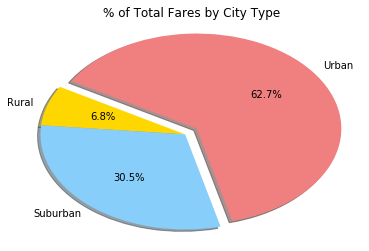

In [20]:
# Calculate Type Percents
piefares_df = combined_df[['type','fare']]
piefares_gb = piefares_df.groupby(['type'])

fares_df = piefares_gb.sum()

# Build Pie Chart

plt.title("% of Total Fares by City Type")
labels = list(fares_df.index.get_values())
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fares_df, labels=labels,colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("tight")


# Save Figure
plt.savefig("Images/FaresByType.png")
# Show Figure
plt.show()

## Total Rides by City Type

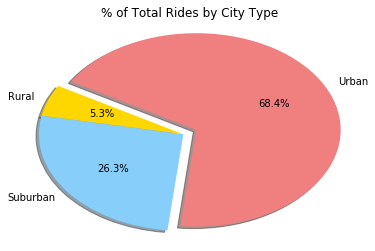

In [21]:
# Calculate Ride Percents
pierides_df = combined_df[['type','ride_id']]
pierides_gb = pierides_df.groupby(['type'])

rides_df = pierides_gb.count()
# Build Pie Chart
plt.title("% of Total Rides by City Type")
labels = list(rides_df.index.get_values())
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(rides_df, labels=labels,colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("tight")


# Save Figure
plt.savefig("Images/RidesByType.png")
# Show Figure
plt.show()

## Total Drivers by City Type

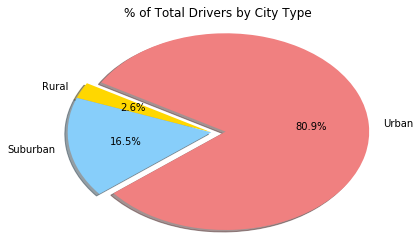

In [22]:
# Calculate Driver Percents
piedrivers_df = city_data[['type','driver_count']]
piedrivers_gb = piedrivers_df.groupby(['type'])

drivers_df = piedrivers_gb.sum()
# Build Pie Chart
plt.title("% of Total Drivers by City Type")
labels = list(drivers_df.index.get_values())
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drivers_df, labels=labels,colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("tight")

# Save Figure
plt.savefig("Images/DriversByType.png")
# Show Figure
plt.show()